## Visualizando a forma de uma onda de áudio


<ipython-input-29-168fc088cdea>:14: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y, sr=sr, x_axis='time')


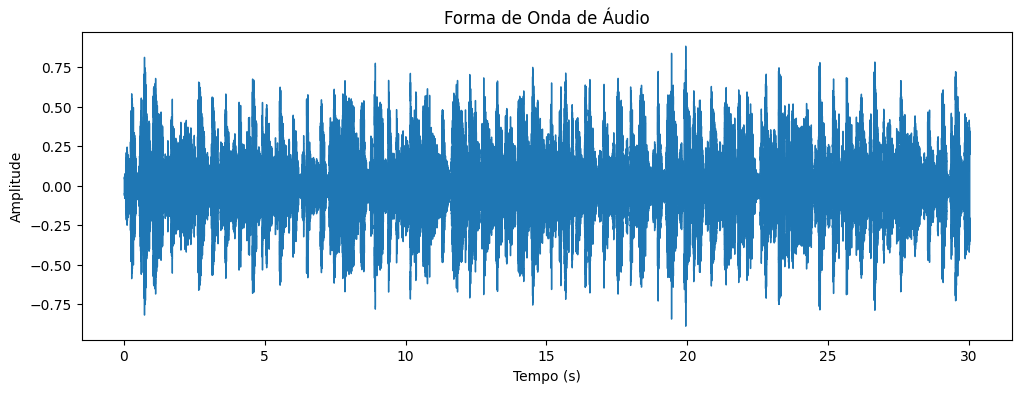

In [29]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

audio_path = "Data/genres_original/blues/blues.00000.wav"

y, sr = librosa.load(audio_path)

duration = librosa.get_duration(y=y, sr=sr)

time = librosa.times_like(y, sr=sr)

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, x_axis='time')
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Forma de Onda de Áudio")
plt.show()

## Extraindo informações do áudio


In [31]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import os
import librosa


audio_folder_paths = ["Data/genres_original/blues/"]

spectral_bandwidth_mean_values = []
spectral_bandwidth_var_values = []
spectral_centroid_mean_values = []
spectral_centroid_var_values = []
spectral_rolloff_mean_values = []
spectral_rolloff_var_values = []
zero_crossing_rate_mean_values = []
chordal_progression_mean_values = []
chroma_stft_mean_values = []
perceptual_mean_values = []
length_values = []
zero_crossing_rate_var_values = []
chordal_progression_var_values = []
chroma_stft_var_values = []
perceptual_var_values = []
mfcc_mean_values = []
mfcc_var_values = []

file_names = []


for audio_folder_path in audio_folder_paths:
  print("Path: ",audio_folder_path)
  for file_name in os.listdir(audio_folder_path):
    file_path = os.path.join(audio_folder_path, file_name)


    y, sr = librosa.load(file_path)
    C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('A1')))
    freqs = librosa.cqt_frequencies(C.shape[0],
                                fmin=librosa.note_to_hz('A1'))

    spectral_bandwidth_mean = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_bandwidth_var = np.var(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_centroid_mean = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_centroid_var = np.var(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_rolloff_mean = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    spectral_rolloff_var = np.var(librosa.feature.spectral_rolloff(y=y, sr=sr))
    mfcc_mean = np.mean(librosa.feature.mfcc(y=y, sr=sr))
    mfcc_var = np.var(librosa.feature.mfcc(y=y, sr=sr))
    zero_crossing_rate_mean = np.mean(librosa.feature.zero_crossing_rate(y=y))
    chroma_stft_mean = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    perceptual_mean = np.mean(librosa.perceptual_weighting(C**2, freqs, ref=np.max))
    zero_crossing_rate_var = np.var(librosa.feature.zero_crossing_rate(y=y))
    chroma_stft_var = np.var(librosa.feature.chroma_stft(y=y, sr=sr))
    perceptual_var = np.var(librosa.perceptual_weighting(C**2, freqs, ref=np.max))

    file_names.append(file_name)
    spectral_bandwidth_mean_values.append(spectral_bandwidth_mean)
    spectral_bandwidth_var_values.append(spectral_bandwidth_var)
    spectral_centroid_mean_values.append(spectral_centroid_mean)
    spectral_centroid_var_values.append(spectral_centroid_var)
    spectral_rolloff_mean_values.append(spectral_rolloff_mean)
    spectral_rolloff_var_values.append(spectral_rolloff_var)
    mfcc_mean_values.append(mfcc_mean)
    mfcc_var_values.append(mfcc_var)
    zero_crossing_rate_mean_values.append(zero_crossing_rate_mean)
    zero_crossing_rate_var_values.append(zero_crossing_rate_var)
    chroma_stft_mean_values.append(chroma_stft_mean)
    chroma_stft_var_values.append(chroma_stft_var)
    perceptual_mean_values.append(perceptual_mean)
    perceptual_var_values.append(perceptual_var)

## Comparação atributos espectrais para músicas de diferentes gêneros musicais


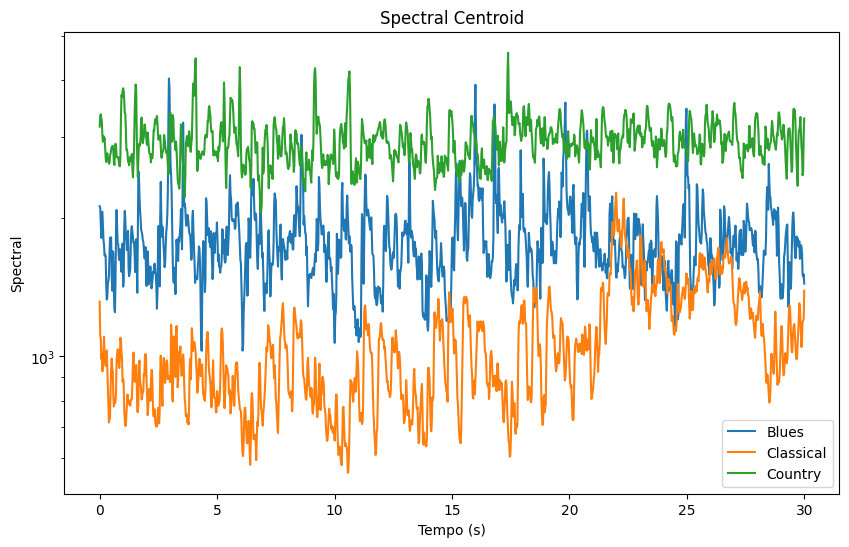

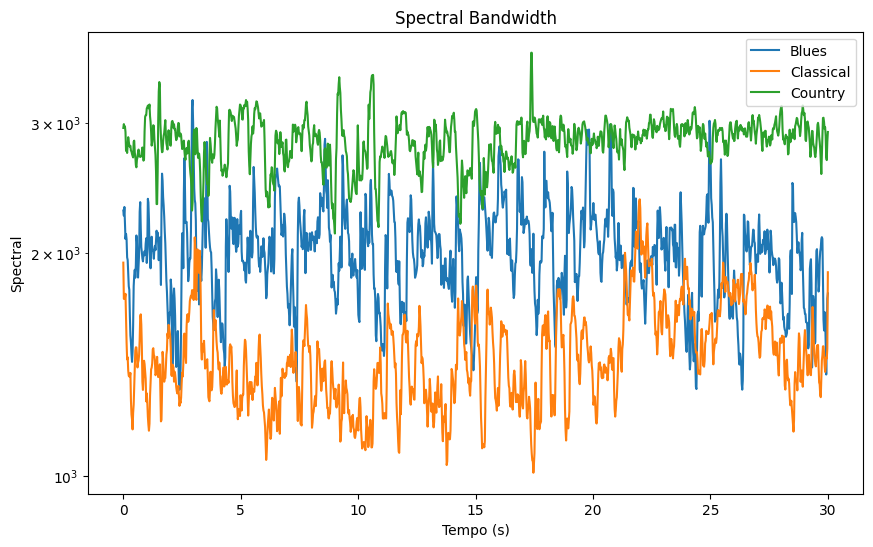

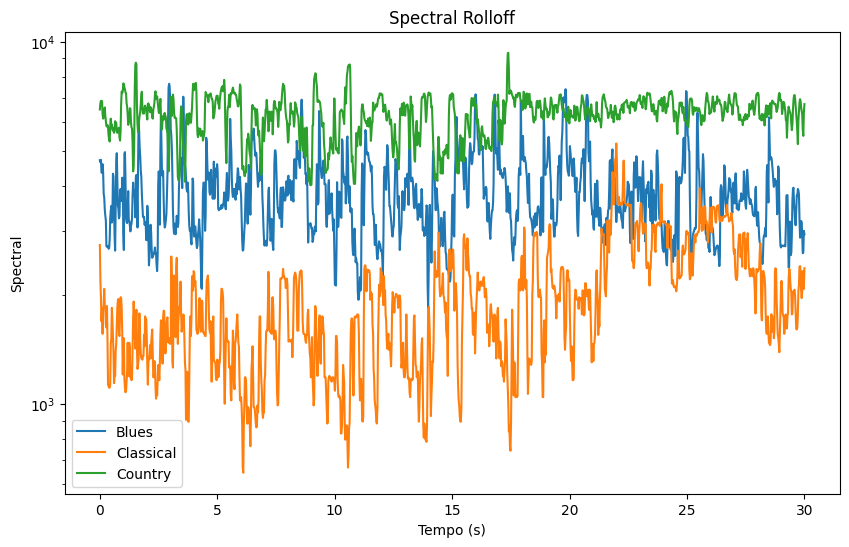

In [28]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

audio_files = [
    "Data/genres_original/blues/blues.00000.wav",
    "Data/genres_original/classical/classical.00016.wav",
    "Data/genres_original/country/country.00001.wav"
]

generos = ['Blues', 'Classical', 'Country']

spectral_centroids_list = []
spectral_bandwidths_list = []
spectral_rolloff_list = []

for audio_file in audio_files:
  y, sr = librosa.load(audio_file)
  spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
  spectral_centroids_list.append(spectral_centroids)
  spectral_bandwidths = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
  spectral_bandwidths_list.append(spectral_bandwidths)
  spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
  spectral_rolloff_list.append(spectral_rolloff)

frames_to_time = librosa.frames_to_time(np.arange(len(spectral_centroids)), sr=sr)

plt.figure(figsize=(10, 6))
for i, spectral_centroids in enumerate(spectral_centroids_list):
  plt.semilogy(frames_to_time, spectral_centroids, label=generos[i])
plt.xlabel('Tempo (s)')
plt.ylabel('Spectral')
plt.title('Spectral Centroid')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for i, spectral_bandwidths in enumerate(spectral_bandwidths_list):
  plt.semilogy(frames_to_time, spectral_bandwidths, label=generos[i])
plt.xlabel('Tempo (s)')
plt.ylabel('Spectral')
plt.title('Spectral Bandwidth')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for i, spectral_rolloff in enumerate(spectral_rolloff_list):
  plt.semilogy(frames_to_time, spectral_rolloff, label=generos[i])
plt.xlabel('Tempo (s)')
plt.ylabel('Spectral')
plt.title('Spectral Rolloff')
plt.legend()
plt.show()


## Trabalhando com o dataset


In [11]:
import pandas as pd
data = pd.read_csv('Data/features_30_sec.csv')
data3 = pd.read_csv('Data/features_3_sec.csv')

In [12]:
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [13]:
data3.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [27]:
pd.set_option('display.float_format', '{:.2f}'.format)
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
length,9990.00,66149.00,0.00,66149.00,66149.00,66149.00,66149.00,66149.00
chroma_stft_mean,9990.00,0.38,0.09,0.11,0.32,0.38,0.44,0.75
chroma_stft_var,9990.00,0.08,0.01,0.02,0.08,0.09,0.09,0.12
rms_mean,9990.00,0.13,0.07,0.00,0.08,0.12,0.18,0.44
rms_var,9990.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03
spectral_centroid_mean,9990.00,2199.22,751.86,472.74,1630.68,2208.63,2712.58,5432.53
spectral_centroid_var,9990.00,416672.70,434964.44,811.88,123196.13,265069.21,562415.25,4794118.60
spectral_bandwidth_mean,9990.00,2241.39,543.85,499.16,1887.46,2230.58,2588.34,3708.15
spectral_bandwidth_var,9990.00,118271.11,101350.46,1183.52,48765.53,89960.72,158567.35,1235142.51
rolloff_mean,9990.00,4566.08,1642.07,658.34,3378.31,4631.38,5591.63,9487.45


In [34]:
data3.shape

(9990, 60)

In [33]:
data3.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [32]:
data3.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

<ipython-input-18-6ff6ff13abae>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, fmt = ".1f", linewidths = .7)


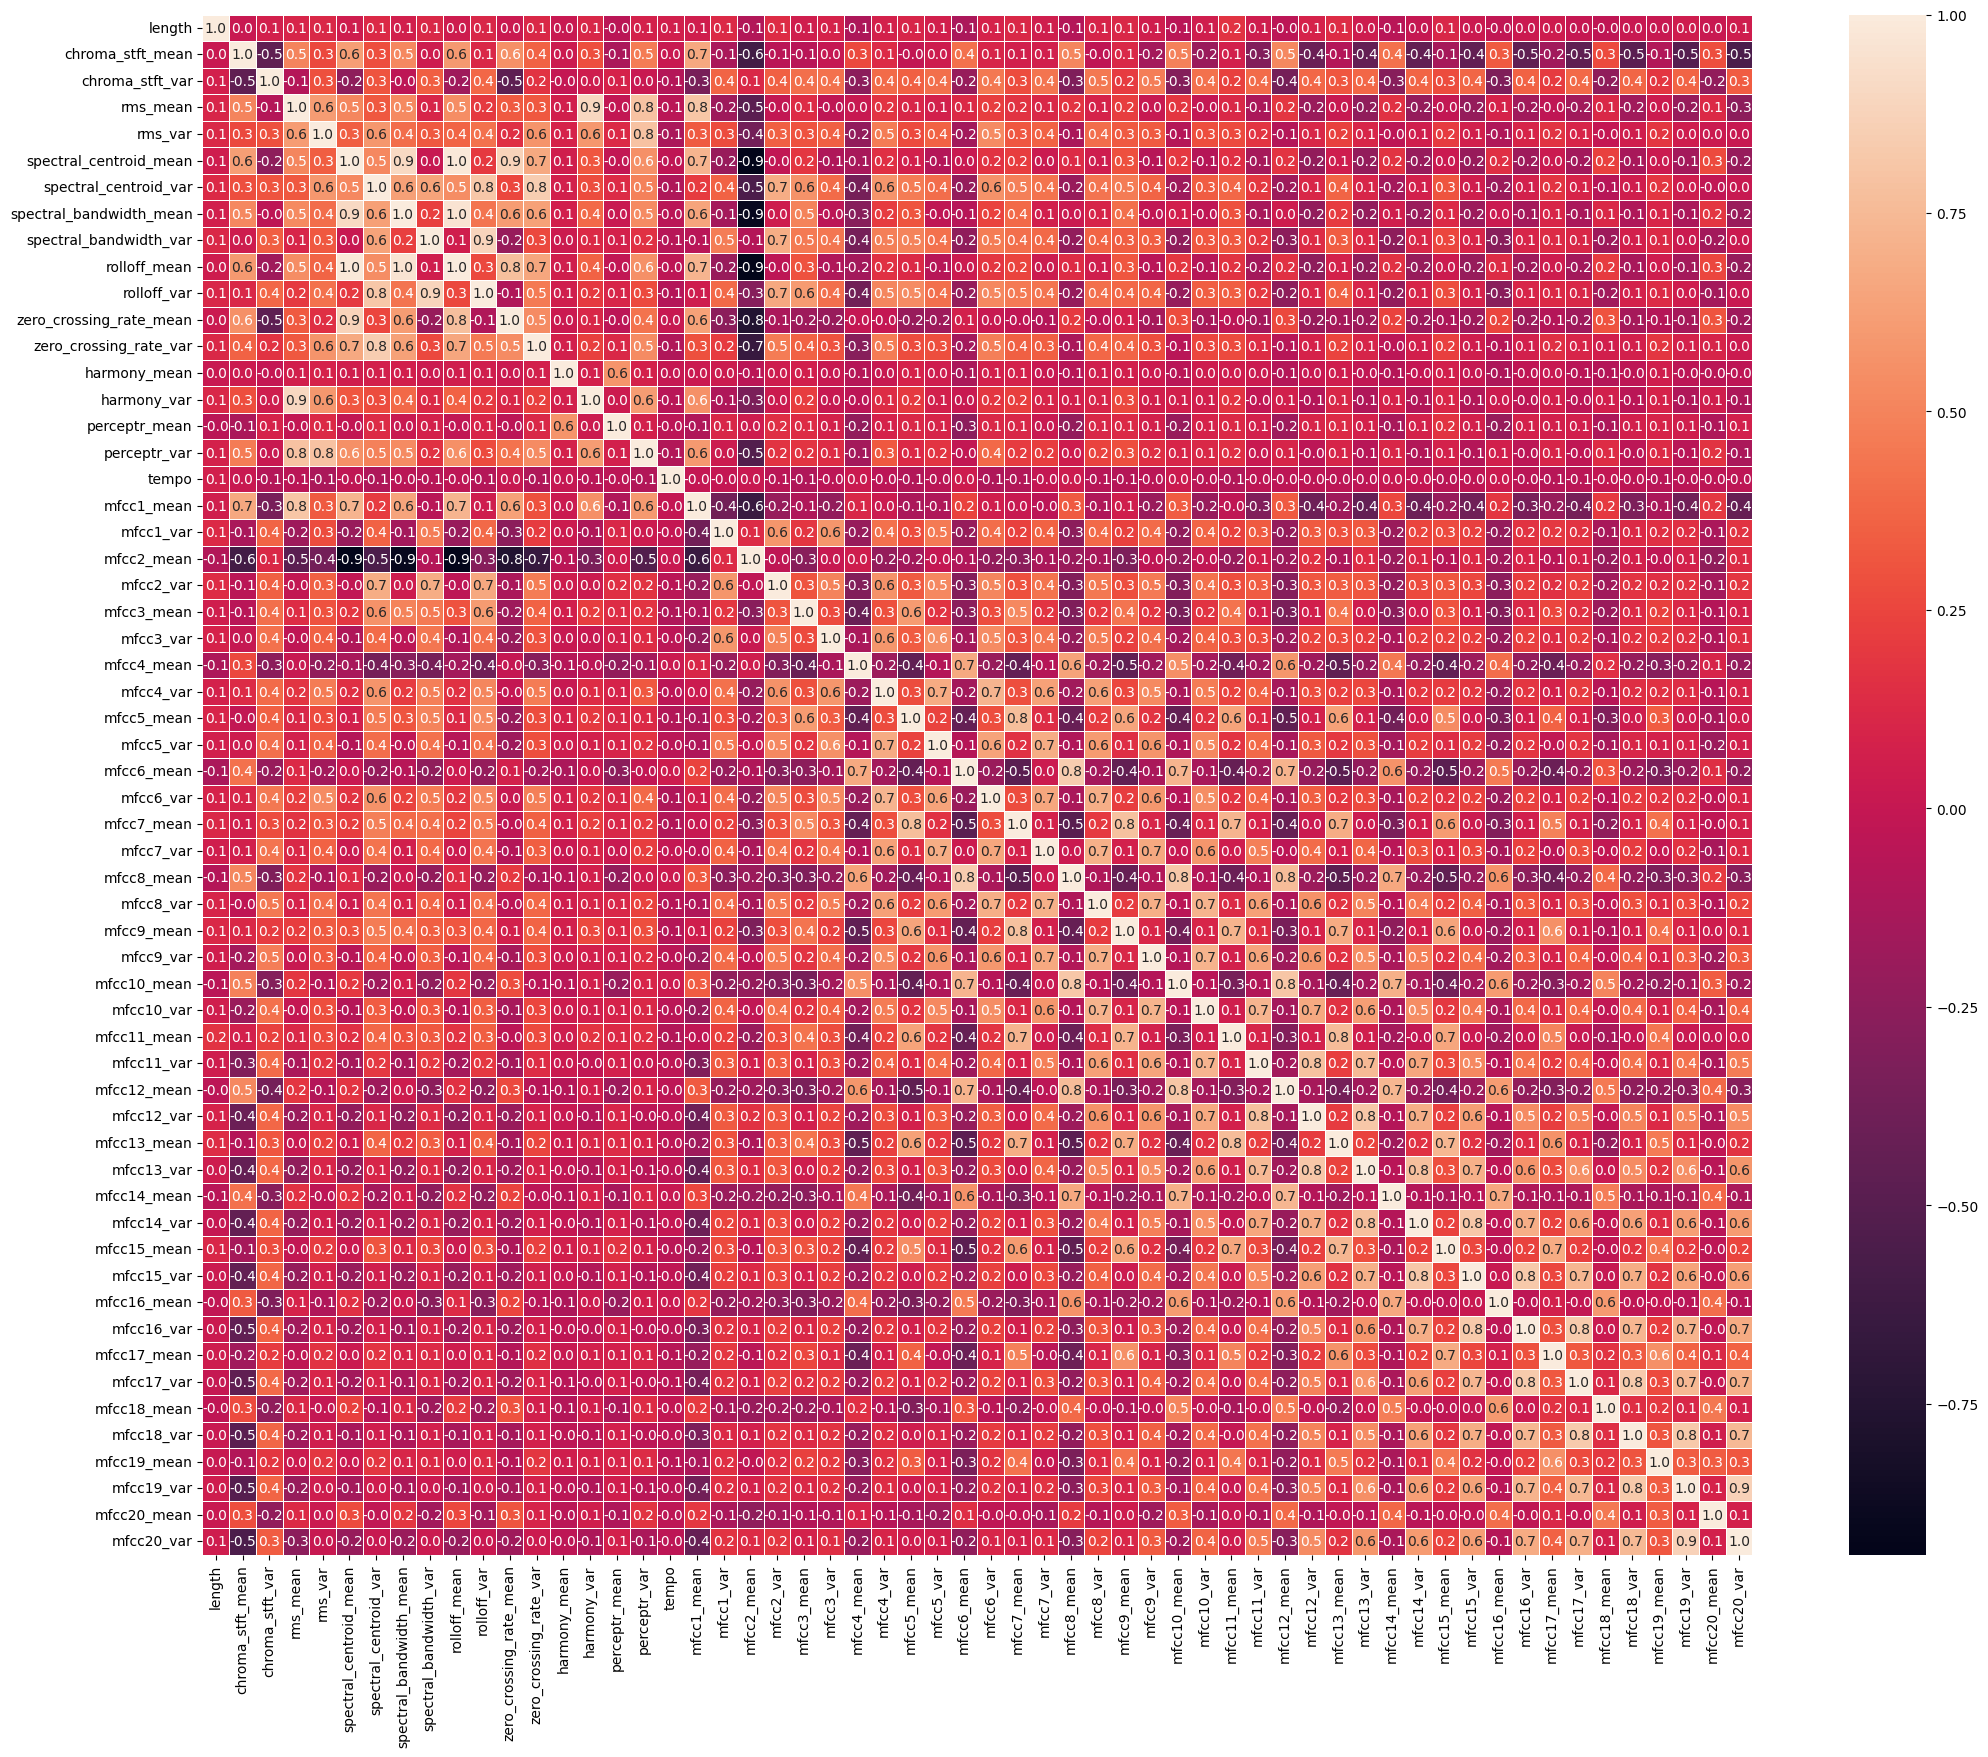

In [18]:
import seaborn as sns
plt.figure(figsize = (25,20))
sns.heatmap(data3.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

## Normalização de "label" e heatmap


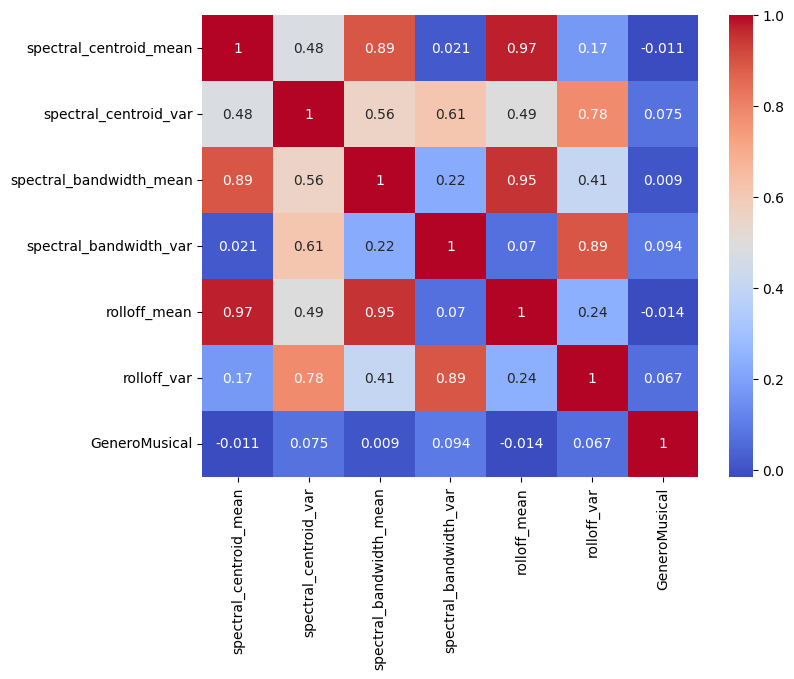

In [23]:
from pyspark.ml.feature import VectorAssembler, StandardScaler, StringIndexer
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.stat import Correlation

# Crie uma sessão Spark
spark = SparkSession.builder \
    .appName("Normalizing Data") \
    .getOrCreate()

dataset = spark.read.csv('Data/features_3_sec.csv', header=True, inferSchema=True)

datanormal = StringIndexer(inputCol="label", outputCol="GeneroMusical")
datanormal = datanormal.fit(dataset).transform(dataset)

columns_to_assemble = ["spectral_centroid_mean", "spectral_centroid_var", "spectral_bandwidth_mean",
    "spectral_bandwidth_var","rolloff_mean", "rolloff_var","GeneroMusical"]
assembler = VectorAssembler(inputCols=columns_to_assemble, outputCol="features")
df_assembled = assembler.transform(datanormal)

corr_matrix = Correlation.corr(df_assembled, "features").head()


corr_matrix_pd = pd.DataFrame(corr_matrix[0].toArray())
corr_matrix_pd.columns = columns_to_assemble
corr_matrix_pd.index = columns_to_assemble

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_pd, annot=True, cmap='coolwarm')
plt.show()

spark.stop()


## Classificador Random Forest


In [24]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import StringIndexer, OneHotEncoder

spark = SparkSession.builder \
    .appName("Random Forest Classifier") \
    .getOrCreate()

dataset = spark.read.csv('Data/features_3_sec.csv', header=True, inferSchema=True)

feature_columns = ["length", "chroma_stft_mean", "chroma_stft_var", "rms_mean", "rms_var",
    "spectral_centroid_mean", "spectral_centroid_var", "spectral_bandwidth_mean",
    "spectral_bandwidth_var","rolloff_mean", "rolloff_var", "zero_crossing_rate_mean",
    "zero_crossing_rate_var","harmony_mean","harmony_var","perceptr_mean","perceptr_var",
    "tempo","mfcc1_var","mfcc2_var","mfcc3_var","mfcc4_var",
    "mfcc5_var","mfcc6_var","mfcc7_var","mfcc8_var","mfcc9_var","mfcc10_var",
    "mfcc11_var","mfcc12_var","mfcc13_var","mfcc14_var","mfcc15_var",
    "mfcc1_mean","mfcc2_mean","mfcc3_mean","mfcc4_mean","mfcc5_mean","mfcc6_mean",
    "mfcc7_mean","mfcc8_mean","mfcc9_mean","mfcc10_mean","mfcc11_mean",
    "mfcc12_mean","mfcc13_mean","mfcc14_mean","mfcc15_mean","mfcc16_mean",
    "mfcc16_var", "mfcc17_mean", "mfcc17_var",
    "mfcc18_mean", "mfcc18_var", "mfcc19_mean", "mfcc19_var", "mfcc20_mean", "mfcc20_var"
    ]

indexer = StringIndexer(inputCol="label", outputCol="labelx")
indexed = indexer.fit(dataset).transform(dataset)


encoder = OneHotEncoder(inputCol="labelx", outputCol="labelvec")
encoder_model = encoder.fit(indexed)
encoded = encoder_model.transform(indexed)

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(encoded)

(trainingData, testData) = data.randomSplit([0.8, 0.2])

rf = RandomForestClassifier(labelCol="labelx", featuresCol="features", numTrees=20, maxDepth=10)

model = rf.fit(trainingData)

predictions = model.transform(testData)

evaluator = MulticlassClassificationEvaluator(
    labelCol="labelx", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Accuracy = %g" % (accuracy))

spark.stop()


+-----------------+------+-------------------+-------------------+-------------------+--------------------+----------------------+---------------------+-----------------------+----------------------+------------------+------------------+-----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+--------------------+--------------

In [25]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import StringIndexer, OneHotEncoder

spark = SparkSession.builder \
    .appName("Random Forest Classifier") \
    .getOrCreate()

dataset = spark.read.csv('Data/features_30_sec.csv', header=True, inferSchema=True)

feature_columns = ["length", "chroma_stft_mean", "chroma_stft_var", "rms_mean", "rms_var",
    "spectral_centroid_mean", "spectral_centroid_var", "spectral_bandwidth_mean",
    "spectral_bandwidth_var","rolloff_mean", "rolloff_var", "zero_crossing_rate_mean",
    "zero_crossing_rate_var","harmony_mean","harmony_var","perceptr_mean","perceptr_var",
    "tempo","mfcc1_var","mfcc2_var","mfcc3_var","mfcc4_var",
    "mfcc5_var","mfcc6_var","mfcc7_var","mfcc8_var","mfcc9_var","mfcc10_var",
    "mfcc11_var","mfcc12_var","mfcc13_var","mfcc14_var","mfcc15_var",
    "mfcc1_mean","mfcc2_mean","mfcc3_mean","mfcc4_mean","mfcc5_mean","mfcc6_mean",
    "mfcc7_mean","mfcc8_mean","mfcc9_mean","mfcc10_mean","mfcc11_mean",
    "mfcc12_mean","mfcc13_mean","mfcc14_mean","mfcc15_mean","mfcc16_mean",
    "mfcc16_var", "mfcc17_mean", "mfcc17_var",
    "mfcc18_mean", "mfcc18_var", "mfcc19_mean", "mfcc19_var", "mfcc20_mean", "mfcc20_var"
    ]

indexer = StringIndexer(inputCol="label", outputCol="labelx")
indexed = indexer.fit(dataset).transform(dataset)


encoder = OneHotEncoder(inputCol="labelx", outputCol="labelvec")
encoder_model = encoder.fit(indexed)
encoded = encoder_model.transform(indexed)

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(encoded)


(trainingData, testData) = data.randomSplit([0.8, 0.2])

rf = RandomForestClassifier(labelCol="labelx", featuresCol="features", numTrees=20, maxDepth=10)

model = rf.fit(trainingData)

predictions = model.transform(testData)

evaluator = MulticlassClassificationEvaluator(
    labelCol="labelx", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Accuracy = %g" % (accuracy))


spark.stop()


+---------------+------+-------------------+-------------------+-------------------+--------------------+----------------------+---------------------+-----------------------+----------------------+------------------+------------------+-----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+--------------------+------------------+-------------------+------------------+--------------------+------------------+-------------------+----------

In [26]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import StringIndexer, OneHotEncoder


spark = SparkSession.builder \
    .appName("Random Forest Classifier") \
    .getOrCreate()


dataset = spark.read.csv('Data/features_3_sec.csv', header=True, inferSchema=True)

feature_columns = ["chroma_stft_mean", "chroma_stft_var", "rms_mean", "rms_var",
    "zero_crossing_rate_mean",
    "zero_crossing_rate_var","harmony_mean","harmony_var","perceptr_mean","perceptr_var",
    "tempo","mfcc1_var","mfcc2_var","mfcc3_var","mfcc4_var",
    "mfcc5_var","mfcc6_var","mfcc7_var","mfcc8_var","mfcc9_var","mfcc10_var",
    "mfcc11_var","mfcc12_var","mfcc13_var","mfcc14_var","mfcc15_var",
    "mfcc1_mean","mfcc2_mean","mfcc3_mean","mfcc4_mean","mfcc5_mean","mfcc6_mean",
    "mfcc7_mean","mfcc8_mean","mfcc9_mean","mfcc10_mean","mfcc11_mean",
    "mfcc12_mean","mfcc13_mean","mfcc14_mean","mfcc15_mean","mfcc16_mean",
    "mfcc16_var", "mfcc17_mean", "mfcc17_var",
    "mfcc18_mean", "mfcc18_var", "mfcc19_mean", "mfcc19_var", "mfcc20_mean", "mfcc20_var"
    ]

indexer = StringIndexer(inputCol="label", outputCol="labelx")
indexed = indexer.fit(dataset).transform(dataset)


encoder = OneHotEncoder(inputCol="labelx", outputCol="labelvec")
encoder_model = encoder.fit(indexed)
encoded = encoder_model.transform(indexed)

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(encoded)


(trainingData, testData) = data.randomSplit([0.8, 0.2])

rf = RandomForestClassifier(labelCol="labelx", featuresCol="features", numTrees=200, maxDepth=23, maxBins=132,impurity='Gini',subsamplingRate=1,featureSubsetStrategy='auto')

model = rf.fit(trainingData)

predictions = model.transform(testData)

evaluator = MulticlassClassificationEvaluator(
    labelCol="labelx", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Accuracy = %g" % (accuracy))


spark.stop()

+-----------------+------+-------------------+-------------------+-------------------+--------------------+----------------------+---------------------+-----------------------+----------------------+------------------+------------------+-----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+--------------------+--------------